# Week 6 - Bivariate Analysis, part 2

# 1. Lesson: no lesson this week

# 2. Weekly graph question

Suppose you wanted to show the nitrate and phosphate level in a water sample.  What are the advantages and disadvantages of showing this as an area plot, as opposed to two separate line graphs?  How would you adjust the graphs shown to improve the presentation?

In [21]:
import numpy as np
import seaborn as sns
import pandas as pd

/tmp/ipykernel_6181/2149468501.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Nitrate level (% of eutrophic value)')

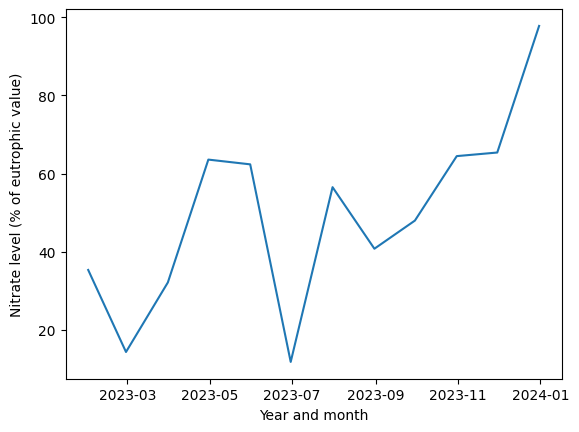

In [22]:
numdates = 12
np.random.seed(0)
time_series = 100 * (np.random.normal(size = numdates) / 5 + np.arange(numdates) / 16)
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Nitrate level (% of eutrophic value)")

/tmp/ipykernel_6181/1726504607.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Phosphate level (% of eutrophic value)')

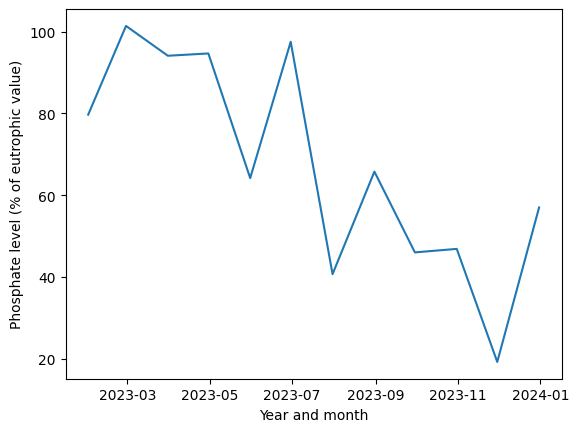

In [23]:
np.random.seed(1)
time_series_2 =  100 * (1 - (np.random.normal(size = numdates) / 8 + np.arange(numdates) / 16))
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series_2)
ax.set_xlabel("Year and month")
ax.set_ylabel("Phosphate level (% of eutrophic value)")

<Axes: >

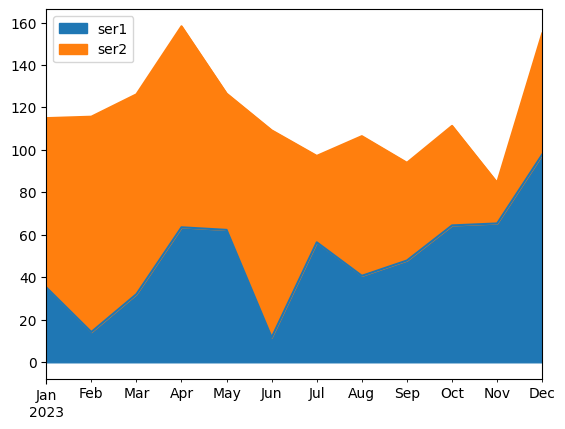

In [24]:
df = pd.DataFrame({'ser1': time_series, 'ser2': time_series_2}, index = datearray)
df.plot.area()

### Weekly Graph Question: My Answers

Using an area plot instead of two separate line graphs has both pros and cons:

#### **Advantages:**
- **Better comparison**: An area plot makes it easier to compare the relative magnitudes of nitrate and phosphate levels over time.
- **More visual impact**: It can highlight the relationship between the two variables more clearly, especially if their trends are inversely related.
- **Space efficiency**: Instead of using two separate graphs, an area plot combines them into one, saving space.

#### **Disadvantages:**
- **Potential overlap**: If one variable is consistently larger, it can obscure the smaller variable.
- **Difficult interpretation**: The stacked nature can make it harder to determine exact values, especially when fluctuations are large.
- **Misleading perception**: The way the data is layered might make it seem like one value depends on the other, even if they are independent.

#### **Improvements to the Graph:**
- **Use transparency**: Adjust the opacity so overlapping areas don’t completely hide each other.
- **Separate y-axes**: If values are on different scales, using dual y-axes might improve clarity.
- **Alternative visualization**: If distinction is key, a side-by-side or overlaid line graph with different colors might be better.

Overall, I think that while an area plot can be useful for spotting trends and relative changes, separate line graphs may be better for precise comparisons.


# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Find correlations between pairs of variables.

- Draw scatterplots, especially when the correlation is large.

- Draw pairplots.

- Draw line graphs and/or area graphs when there is date or time data together with numerical data.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!

- Do you see any outliers?  (Data points that are far from the rest of the data).

- Are any data items highly correlated with each other, suggesting that they are redundant?

- For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?

- Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)

### Dataset Choice: Lexi's Bank Customer Churn Dataset  

For this week's analysis, I'm using a dataset from Lexi, a former teammate from last semester's group work. She worked on a **bank customer churn prediction dataset**, which focuses on whether customers leave the bank or stay. The dataset includes key factors like **customer demographics, account balance, credit score, and transaction behavior** to help predict churn.  

This dataset is useful because it combines financial and behavioral data, making it a solid choice for exploring correlations, trends, and potential confounding variables. I'll apply different types of visualizations and statistical analysis to better understand patterns in customer churn.  


In [25]:

# 1) First, let's access the dataset

import kagglehub
import os

# Download Lexi's Bank Customer Churn dataset
path = kagglehub.dataset_download("adammaus/predicting-churn-for-bank-customers")

print("Path to dataset files:", path)

# Locate the correct CSV file
csv_file = os.path.join(path, "Churn_Modelling.csv")  # Adjust filename if necessary

# Load the dataset into a DataFrame
df = pd.read_csv(csv_file)

# Display basic info and first few rows
print("Dataset loaded successfully!")
df.head()

Path to dataset files: /home/codespace/.cache/kagglehub/datasets/adammaus/predicting-churn-for-bank-customers/versions/1
Dataset loaded successfully!


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


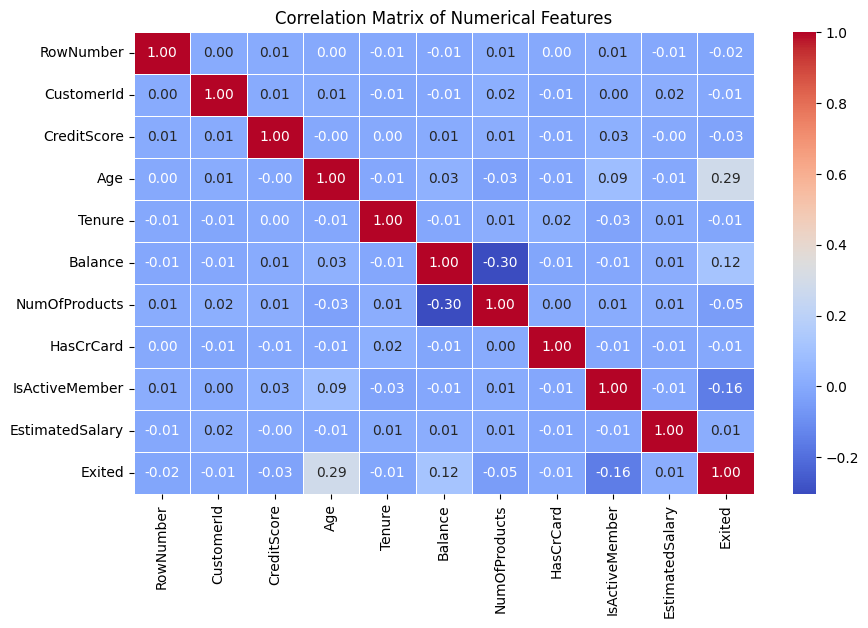

In [26]:
# 2) Finding Correlations Between Pairs of Variables

import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

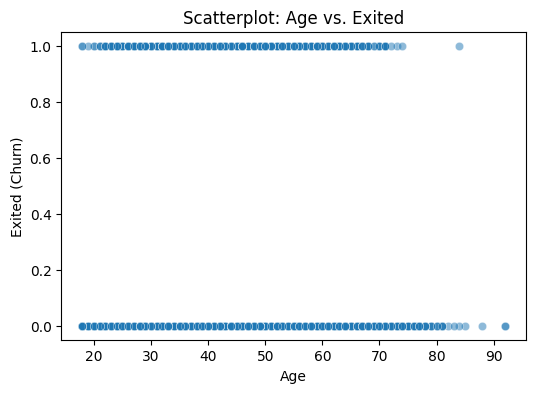

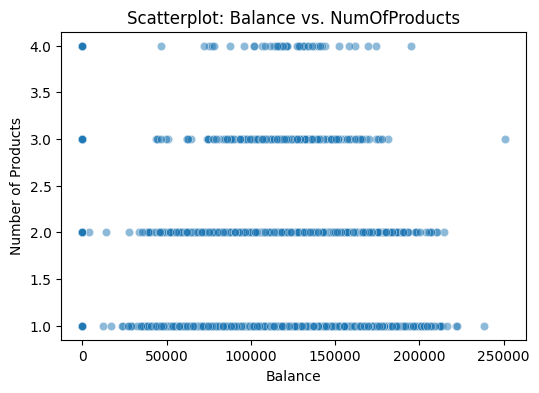

In [27]:
# 3) Drawing Scatterplots for Strongly Correlated Variables


# Scatterplot: Age vs. Exited (churn)
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df["Age"], y=df["Exited"], alpha=0.5)
plt.title("Scatterplot: Age vs. Exited")
plt.xlabel("Age")
plt.ylabel("Exited (Churn)")
plt.show()

# Scatterplot: Balance vs. NumOfProducts
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df["Balance"], y=df["NumOfProducts"], alpha=0.5)
plt.title("Scatterplot: Balance vs. NumOfProducts")
plt.xlabel("Balance")
plt.ylabel("Number of Products")
plt.show()


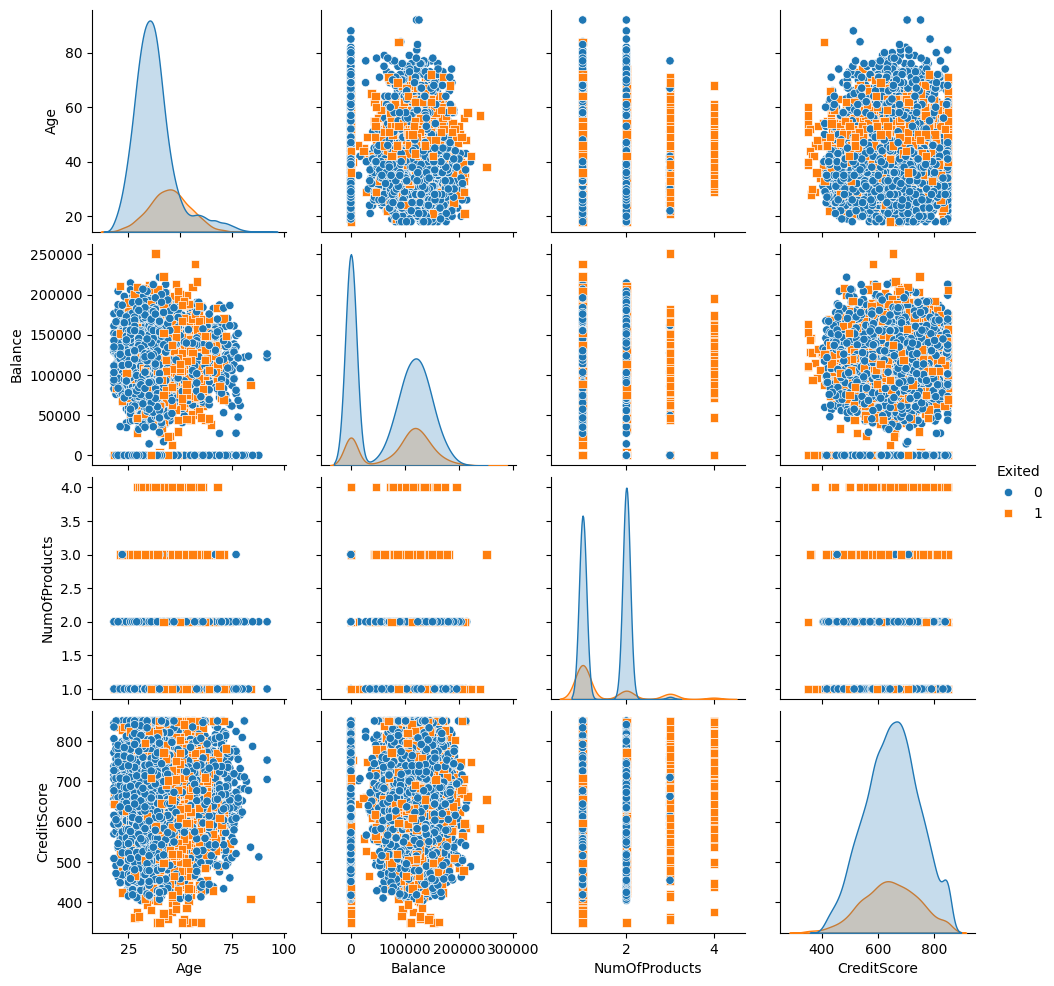

In [28]:
# 4) Drawing Pairplots


# Selecting key variables for the pairplot
selected_features = ["Age", "Balance", "NumOfProducts", "CreditScore", "Exited"]

# Creating the pairplot
sns.pairplot(df[selected_features], hue="Exited", diag_kind="kde", markers=["o", "s"])


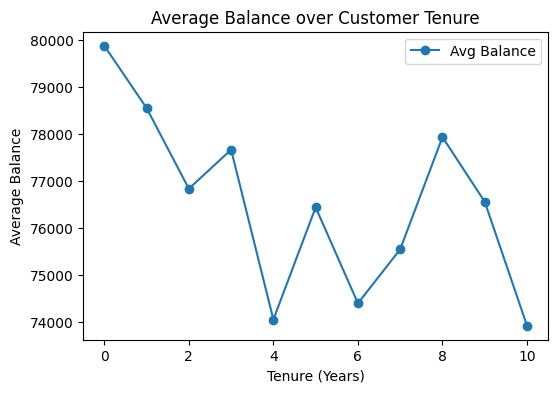

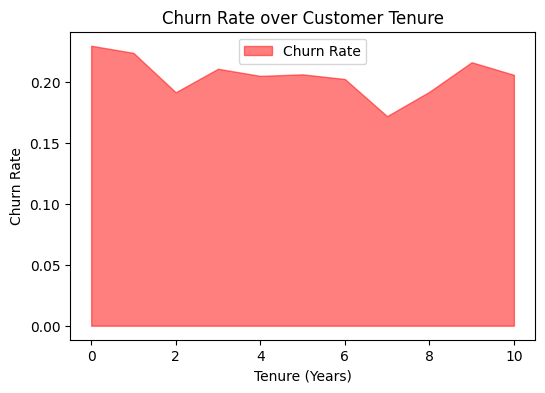

In [29]:
# 5) Drawing Line and Area Graphs

# Grouping by Tenure to analyze trends
tenure_group = df.groupby("Tenure").agg({"Balance": "mean", "Exited": "mean"}).reset_index()

# Line plot for Balance over Tenure
plt.figure(figsize=(6, 4))
plt.plot(tenure_group["Tenure"], tenure_group["Balance"], marker="o", linestyle="-", label="Avg Balance")
plt.xlabel("Tenure (Years)")
plt.ylabel("Average Balance")
plt.title("Average Balance over Customer Tenure")
plt.legend()
plt.show()

# Area plot for Churn Rate over Tenure
plt.figure(figsize=(6, 4))
plt.fill_between(tenure_group["Tenure"], tenure_group["Exited"], alpha=0.5, color="red", label="Churn Rate")
plt.xlabel("Tenure (Years)")
plt.ylabel("Churn Rate")
plt.title("Churn Rate over Customer Tenure")
plt.legend()
plt.show()


### **My Conclusions from the Analysis**  

From the analysis of Lexi's **Bank Customer Churn dataset**, a few key insights stand out:  

- **Correlations:** Most numerical features show weak correlations, but **Age (0.29) and Balance (0.12) have some connection to churn**. Interestingly, **NumOfProducts and Balance (-0.30)** show a moderate negative correlation, meaning customers with higher balances tend to have fewer products.  

- **Scatterplots:** The scatterplot of **Age vs. Churn** confirms that older customers are more likely to churn. The **Balance vs. NumOfProducts** plot highlights distinct clusters, suggesting that most customers stick to one or two products, with fewer opting for three or four.  

- **Pairplot:** The pairplot reinforced these findings, showing some separation in churners based on **age, balance, and number of products**. However, **CreditScore doesn’t seem to impact churn much**, as churners are spread across all credit scores.  

- **Line & Area Graphs:** The **balance fluctuates over tenure**, with no clear increasing or decreasing trend. The **churn rate remains relatively stable** across tenure, meaning tenure alone isn’t a strong predictor of churn.  

Overall, this dataset suggests that **age, balance, and the number of products a customer holds are key factors to explore further** in predicting churn. There’s no single dominant factor, so a **combination of features** would likely be needed for an effective predictive model.  


# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 86-98 of the Storytelling With Data book as best you can.  (The second half of chapter three).  You do not have to get the exact data values right, just the overall look and feel.

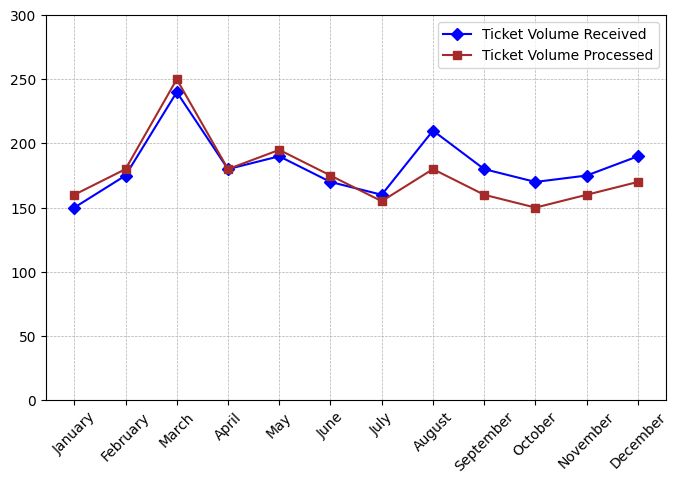

In [31]:
# Storytelling With Data - Figure 3.18 (Page 92)

# Sample data for replication
months = ["January", "February", "March", "April", "May", "June", "July", 
          "August", "September", "October", "November", "December"]
received = [150, 175, 240, 180, 190, 170, 160, 210, 180, 170, 175, 190]
processed = [160, 180, 250, 180, 195, 175, 155, 180, 160, 150, 160, 170]

# Plot
plt.figure(figsize=(8, 5))

plt.plot(months, received, marker="D", linestyle="-", color="blue", label="Ticket Volume Received")


plt.plot(months, processed, marker="s", linestyle="-", color="brown", label="Ticket Volume Processed")

# Formatting
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 310, 50))
plt.xlabel("")
plt.ylabel("")
plt.title("")
plt.legend()
plt.grid(True, linestyle="--", linewidth=0.5)

# Show plot
plt.show()
